<a href="https://colab.research.google.com/github/surabhipandey18/Deep-Learning/blob/main/vgg_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#load dataset and preprocess
X_train, y_train = tf.keras.datasets.mnist.load_data()[0]
X_test, y_test = tf.keras.datasets.mnist.load_data()[1]
def preprocess(image, label):
  image = tf.expand_dims(image, -1)
  image = tf.image.resize(image, (224, 224))
  image = tf.tile(image, [1, 1, 3])
  image = tf.cast(image, tf.float32) / 255.
  label = tf.one_hot(label, depth=10)
  return image, label

ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
                   .batch(64) \
                   .prefetch(tf.data.AUTOTUNE)
ds_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
                   .batch(64) \
                   .prefetch(tf.data.AUTOTUNE)

In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
#flatten and add FC layers on the output
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

vgg_model = Model(inputs = base_model.input, outputs = output)

In [8]:
vgg_model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device('/GPU:0'):
  history = vgg_model.fit(ds_train, validation_data=ds_test, epochs=10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 330s 349ms/step - accuracy: 0.9552 - loss: 0.1398 - val_accuracy: 0.9881 - val_loss: 0.0360
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 370s 337ms/step - accuracy: 0.9585 - loss: 0.1293 - val_accuracy: 0.9876 - val_loss: 0.0373
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 358s 376ms/step - accuracy: 0.9667 - loss: 0.1038 - val_accuracy: 0.9910 - val_loss: 0.0306
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 346s 337ms/step - accuracy: 0.9652 - loss: 0.1011 - val_accuracy: 0.9915 - val_loss: 0.0286
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 322s 337ms/step - accuracy: 0.9692 - loss: 0.0909 - val_accuracy: 0.9910 - val_loss: 0.0290
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 359s 377ms/step - accuracy: 0.9715 - loss: 0.0846 - val_accuracy: 0.9927 - val_loss: 0.0257
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 317s 338ms/step - accuracy: 0.9714 - loss: 0.0833 - val_accuracy: 0.9915 - val_loss: 0.0316
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 322s 337ms/step - accuracy: 0.9748 -

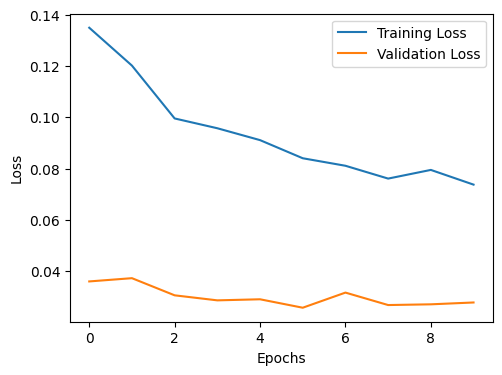

In [10]:
#figure of different optimizers working
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

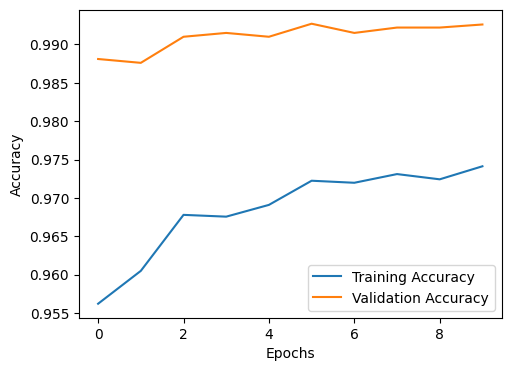

In [11]:
#figure of different loss of optimizers
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
print(vgg_model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,266,784 (203.20 MB)

 Trainable params: 12,850,698 (49.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 25,701,398 (98.04 MB)

None


In [14]:
import joblib
joblib.dump(vgg_model, 'vgg_model.pkl')

['vgg_model.pkl']

In [16]:
print(f" Val Accuracy: {history.history['val_accuracy'][-1]:.4f}, Val Loss: {history.history['val_loss'][-1]:.4f}")

 Val Accuracy: 0.9926, Val Loss: 0.0278
